## Homework 5

**Note: If this is one of your two late homework submissions, please indicate below; also indicate whether it is your first or second late submission.**

\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_

This homework assignment has **two parts**. In the first, you will practice building a recommender system; in the second, you'll practice training a neural network for image classification. I strongly advise using Lab 8 and Lab 9 for assistance as you work on this assignment. Make sure to **read the entire assignment**.

You also may need to use other functions. I encourage you to make use of available resources (including the Internet) to help you solve these problems. You can also work with your classmates. If you do work together, you must provide the names of those classmates below.

[Names of Collaborators (if any): Anthony Cu]{.underline}

### Recommender Systems

We'll work with the data in `data/movies.csv` and `data/movie-ratings.csv`. `movies` contains a list of $9,737$ movies and their basic description – title, year of release, and genres, separated by vertical bars (for example, `Comedy|Romance`). `movie-ratings` contains ratings of movies by $610$ users, on a scale from $0$ to $5$.

The data come from this source at Kaggle: <https://www.kaggle.com/datasets/gargmanas/movierecommenderdataset/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

#### Exercise 1

Read both data files into Python. (You can also use R, if you prefer. If you do use R, I would recommend working with a smaller subset of the data.)

Movie title and year of release are in the same column. Create a new variable that represents year of release, as a four-digit number.

In [2]:
ratings = pd.read_csv("~/Desktop/P134/homework-5/data/movie-ratings.csv")
movies = pd.read_csv("~/Desktop/P134/homework-5/data/movies.csv")

In [4]:
movies['year'] = [movies['title'][i][-5:-1] for i in range(len(movies))] # year of release
movies['year'] = pd.to_numeric(movies['year'], errors = 'coerce')
# movies['title'] = [movies['title'][i][:-7] for i in range(len(movies))] # cutting year out of movie title

#### Exercise 2

Create a histogram of year of release. How would you describe the shape of the distribution? When were the most movies released?

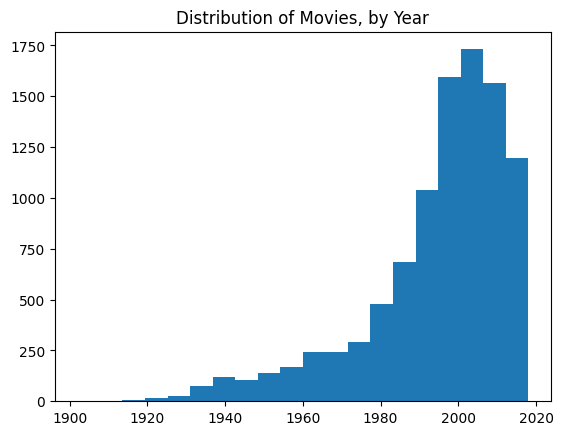

In [6]:
plt.hist(movies['year'], bins = 20)
plt.title("Distribution of Movies, by Year")
plt.show()

The distribution is heavily skewed to the right, most of the movies are released after 2000.

#### Exercise 3

Create a bar chart of the top 10 highest-rated movies.

In [121]:
avg_rating = ratings.groupby('movieId')['rating'].mean().reset_index()

In [122]:
avg_rating = avg_rating.sort_values(by = 'rating', ascending = False)

In [123]:
averages = avg_rating.merge(movies[['movieId','title']], on = 'movieId', how = 'left')

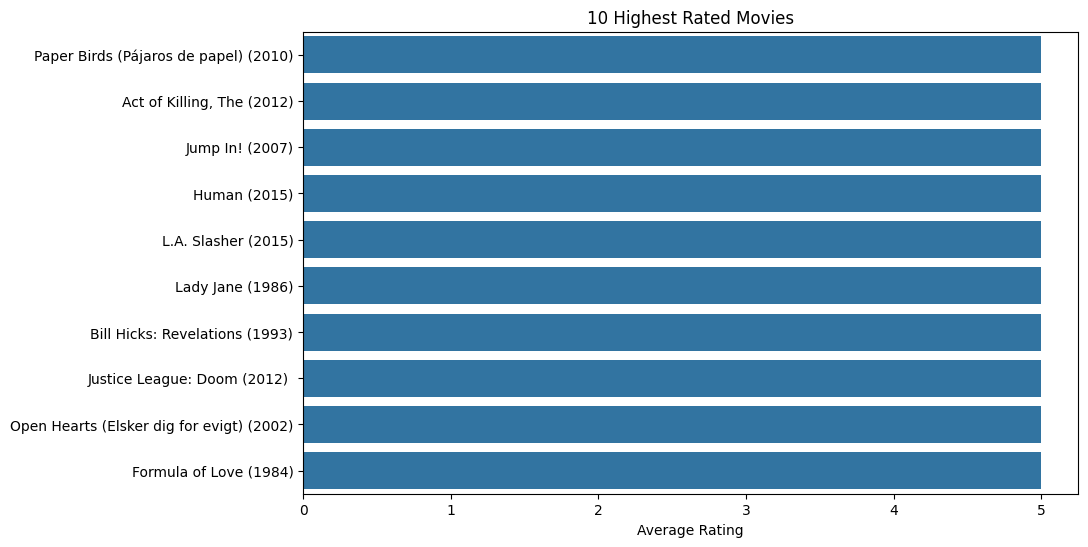

In [91]:
# top 10 highest rated movies all have a rating of 5 so 
plt.figure(figsize = (10,6))
sns.barplot(data = averages[:10], x = 'rating', y = 'title')

plt.title('10 Highest Rated Movies')
plt.xlabel('Average Rating')
plt.ylabel(None)

plt.show()

#### Exercise 4

Create a variable called `string` that contains the text of each movie's genres, title, and year of release. For example, the value of `string` for `movieID == 2` should be: `"Adventure Children Fantasy Jumanji (1995)"`. [assignment originally said movieID == 3 which was incorrect when referencing movies.csv]

In [103]:
movies['string'] = [movies['genres'][i].replace('|',' ') + ' ' + movies['title'][i] for i in range(len(movies))]

#### Exercise 5

Using the `string` variable, create a tf-idf matrix with `TfidfVectorizer` and `tfv.fit`.

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features = None, strip_accents = "unicode", analyzer = "word",
                      token_pattern = r"\w{1,}", ngram_range = (1, 3), stop_words = "english")

In [110]:
string = movies['string']
tfv_matrix = tfv.fit_transform(string)

#### Exercise 6

Use the sigmoid kernel from `scikit-learn` to calculate pairwise similarities between all items in your tf-idf matrix.

In [113]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)      # Computing sigmoid kernel

rec_indices = pd.Series(movies.index, index = movies["title"]).drop_duplicates()

#### Exercise 7

Define a function, `give_recommendation()`, that takes as input the title of a movie and returns the top 10 most similar movies.

In [125]:
def give_recommendation(title, sig = sig):
    '''
    Returns the top 10 recommendations given a movie
    Input:
    * title - title of the movie, includes year of release at the end in the form (xxxx)
    * sig = sig - sigmoid similarity matrix (for movies, the dataframe used in this assignment)
    Output:
    * dataframe - dataframe containing top 10 recommendations (in order of score)
    '''
    idx = rec_indices[title]

    sig_score = list(enumerate(sig[idx])) # gets similarity scores
    sig_score = sorted(sig_score, key = lambda x: x[1], reverse = True)
    sig_score = sig_score[1:11]
    movie_indices = [i[0] for i in sig_score]

    # dataframe for top 10 movies
    rec_dict = {"No" : range(1,11),
                "Movie" : movies['title'].iloc[movie_indices].values}
    df = pd.DataFrame(data = rec_dict)
    df.set_index("No", inplace = True)

    return df

#### Exercise 8

What movies does your recommender system suggest for a user who likes "Toy Story" (released in 1995)?

In [127]:
give_recommendation('Toy Story (1995)')

,Movie
No,
1,Toy Story 2 (1999)
2,Toy Story 3 (2010)
3,Antz (1998)
4,Moana (2016)
5,"Wild, The (2006)"
6,"Tale of Despereaux, The (2008)"
7,"Monsters, Inc. (2001)"
8,Shrek the Third (2007)
9,Turbo (2013)


#### For 234 Students:

#### Exercise 9

Now we'll try making content-based recommendations. Turn the data into a CSR matrix using `scipy.sparse`.

#### Exercise 10

Fit a *k*-nearest neighbors model, using cosine similarity as the distance metric.

#### Exercise 11

Identify which movies your model deems most similar to "GoldenEye" (a James Bond movie, also released in 1995).


### Image Classification

Now we'll work with the data in `data/Animals`. This dataset, intended for animal image classification, [comes from Kaggle.](https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset) It consists of $3,000$ JPEG RGB images, each of which are 256 x 256 pixels, that have been divided into three classes with $1,000$ images in each class. The classes are `cats`, `dogs`, and `snakes`.

#### Exercise 12

Randomly select $150$ images of cats, $150$ images of dogs, and $150$ images of snakes. Set these aside in another directory labeled `test_images` to be your testing set. Using the same approach, randomly select another $150$ images from each class, and set these aside in a `validation_images` directory to be your validation set.

In [142]:
import os
import shutil
import random
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [63]:
# loading images into list to sample from 
cat_path = 'data/Animals/cats'
cats = os.listdir(cat_path)

dog_path = 'data/Animals/dogs'
dogs = os.listdir(dog_path)

snake_path = 'data/Animals/snakes'
snakes = os.listdir(snake_path)

In [80]:
# randomly selecting 150 photos from each folder
random.seed(18747)

# randomly select 450 photos
cats_sample = random.sample(cats, 450)
dogs_sample = random.sample(dogs, 450)
snakes_sample  = random.sample(snakes, 450)

# dividing images for cats
cats_train = random.sample(cats_sample, 150)
cats_remaining = [img for img in cats_sample if img not in cats_train]
cats_test = random.sample(cats_remaining, 150)
cats_validation = [img for img in cats_remaining if img not in cats_test]

# dividing images for dogs
dogs_train = random.sample(dogs_sample, 150)
dogs_remaining = [img for img in dogs_sample if img not in dogs_train]
dogs_test = random.sample(dogs_remaining, 150)
dogs_validation = [img for img in dogs_remaining if img not in dogs_test]

# dividing images for snakes
snakes_train = random.sample(snakes_sample, 150)
snakes_remaining = [img for img in snakes_sample if img not in snakes_train]
snakes_test = random.sample(snakes_remaining, 150)
snakes_validation = [img for img in snakes_remaining if img not in snakes_test]

In [128]:
# add sampled images to test_images 
train_images_path = "data/Animals/train_images"
test_images_path = "data/Animals/test_images"
validation_images_path = "data/Animals/validation_images"

# adding train images to folder
for image in cats_train:
    image_path = 'data/Animals/cats/' + image
    dest_path = train_images_path + '/cats'
    shutil.copy(image_path, dest_path)

for image in dogs_train:
    image_path = 'data/Animals/dogs/' + image
    dest_path = train_images_path + '/dogs'
    shutil.copy(image_path, dest_path)

for image in snakes_train:
    image_path = 'data/Animals/snakes/' + image
    dest_path = train_images_path + '/snakes'
    shutil.copy(image_path, dest_path)

# adding test_images to folder
for image in cats_test:
    image_path = 'data/Animals/cats/' + image
    dest_path = test_images_path + '/cats'
    shutil.copy(image_path, dest_path)

for image in dogs_test:
    image_path = 'data/Animals/dogs/' + image
    dest_path = test_images_path + '/dogs'
    shutil.copy(image_path, dest_path)

for image in snakes_test:
    image_path = 'data/Animals/snakes/' + image
    dest_path = test_images_path + '/snakes'
    shutil.copy(image_path, dest_path)

# adding images to validation folder
for image in cats_validation:
    image_path = 'data/Animals/cats/' + image
    dest_path = validation_images_path + '/cats'
    shutil.copy(image_path, dest_path)

for image in dogs_validation:
    image_path = 'data/Animals/dogs/' + image
    dest_path = validation_images_path + '/dogs'
    shutil.copy(image_path, dest_path)

for image in snakes_validation:
    image_path = 'data/Animals/snakes/' + image
    dest_path = validation_images_path + '/snakes'
    shutil.copy(image_path, dest_path)

#### Exercise 13

Display a random image from each of the three classes in your training set to verify that the data are set up correctly.

In [137]:
# selecting random photo from each category to display
random.seed(578374)
cat_path = "data/Animals/train_images/cats"
cat_img = random.sample(os.listdir(cat_path), 1)[0]

dog_path = "data/Animals/train_images/dogs"
dog_img = random.sample(os.listdir(dog_path), 1)[0]

snake_path = "data/Animals/train_images/snakes"
snake_img = random.sample(os.listdir(snake_path), 1)[0]

In [143]:
cat_image_path = "data/Animals/train_images/cats/" + cat_img
dog_image_path = "data/Animals/train_images/dogs/" + dog_img
snake_image_path = "data/Animals/train_images/snakes/" + snake_img

cat_img = keras.preprocessing.image.load_img(cat_image_path)
dog_img = keras.preprocessing.image.load_img(dog_image_path)
snake_img = keras.preprocessing.image.load_img(snake_image_path)


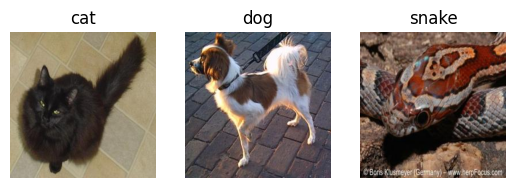

In [144]:
# plotting images
fig, axes = plt.subplots(1, 3)

# Plot images
axes[0].imshow(cat_img, cmap='gray')
axes[0].set_title('cat')
axes[0].axis('off')

axes[1].imshow(dog_img, cmap='gray')
axes[1].set_title('dog')
axes[1].axis('off')

axes[2].imshow(snake_img, cmap='gray')
axes[2].set_title('snake')
axes[2].axis('off')

plt.show()

#### Exercise 14

Using `ImageDataGenerator` and `flow_from_directory`, rescale your training, testing, and validation sets. Load and preprocess your images in batches of size $10$.

In [145]:
# rescaling all sets and loading in batches of 10
# training set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # scale the data
train_image_generator = train_gen.flow_from_directory(train_images_path, 
                                                      target_size = (150, 150), 
                                                      batch_size = 10, 
                                                      class_mode = 'categorical')

# testing set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # scale the data
test_image_generator = train_gen.flow_from_directory(test_images_path, 
                                                     target_size = (150, 150), 
                                                     batch_size = 10, 
                                                     class_mode = 'categorical')

# validation set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # scale the data
val_image_generator = train_gen.flow_from_directory(validation_images_path, 
                                                    target_size = (150, 150), 
                                                    batch_size = 10, 
                                                    class_mode = 'categorical')

Found 450 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


#### Exercise 15

Set up a convolutional neural net (CNN) with 7 layers using `Sequential()`. The layers should be as follows:

1. 2D convolutional input layer with a ReLU activation function;
2. Max pooling layer for 2D spatial data;
3. 2D convolutional layer with ReLU activation;
4. Max pooling layer for 2D spatial data;
5. Flattening layer;
6. Dense layer with $128$ units and ReLU activation;
7. Dense output layer with softmax activation.

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, strides = 1, 
                 padding = 'same', activation = 'relu', 
                 input_shape = [150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters = 64, kernel_size = 3, strides = 1, 
                 padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

#### Exercise 16

Using Adam and categorical cross-entropy, fit the network you've created and let it run for $12$ epochs.

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience = 5)

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = model.fit(train_image_generator, epochs = 12, verbose = 1, 
                 validation_data = val_image_generator, 
                 steps_per_epoch = 15000//32, validation_steps = 3000//32, 
                 callbacks = early_stopping)

#### Exercise 17

Create a plot of the accuracy and loss by the number of epochs.

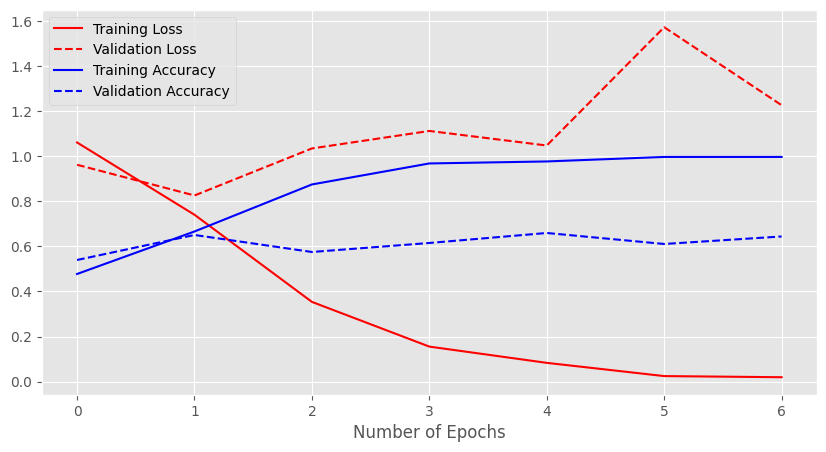

In [148]:
# plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

#### For 234 Students:

#### Exercise 18

Look at your model's accuracy on your testing set. How did it do?

#### Exercise 19

Generate your model's prediction for a random image from the dataset.

#### Exercise 20

Create a confusion matrix using your testing set. Visualize the matrix as a heat map. Which classes was your model best at predicting? Which was it worst at predicting? How do you know?